# 2-2. 데이터 다운로드 및 분석

In [1]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [5]:
import os
path_to_file = "./data/korean-english-park.train.ko"

with open(path_to_file,"r") as f:
    raw = f.read().splitlines()
    
print("Data Size: ",len(raw))
print("Example : ")
for sen in raw[0:100][::20]: print(">>",sen)

Data Size:  94123
Example : 
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


### 문장의 개수는 94123개인데 각 문장의 길이는 어떻게 되는지 확인해보기

문장의 최단 길이 :  1
문장의 최장 길이 :  377
문장의 평균 길이 :  60


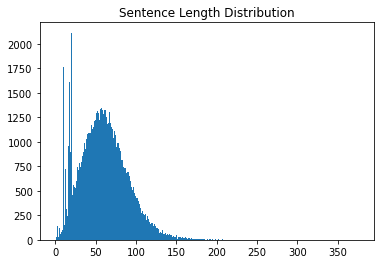

In [6]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length : min_len = length
    if max_len < length : max_len = length
    sum_len += length
    
print("문장의 최단 길이 : ",min_len)
print("문장의 최장 길이 : ",max_len)
print("문장의 평균 길이 : ",sum_len//len(raw))

sentence_length = np.zeros((max_len),dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1
    
plt.bar(range(max_len),sentence_length,width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 길이가 1인 문장은 무엇일까?

In [7]:
def check_sentence_with_length(raw,length):
    count = 0
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count+=1
            if count >100: return

#확인을 해보니 데이터 전처리가 되어 있지 않다. 
check_sentence_with_length(raw,1)

’


In [8]:
#문장의 길이가 1500이상인 문장들의 인덱스 번호 뽑아내기 
for idx,_sum in enumerate(sentence_length):
    if _sum>1500:
        print("outlier index : ",idx+1)

outlier index :  11
outlier index :  19
outlier index :  21


In [9]:
#확인을 해보니 중복된 문장들이 있다. 
check_sentence_with_length(raw,11)
check_sentence_with_length(raw,19)
check_sentence_with_length(raw,21)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

### 중복을 제거한 후 분포를 다시 확인해보기 

Data size:  77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


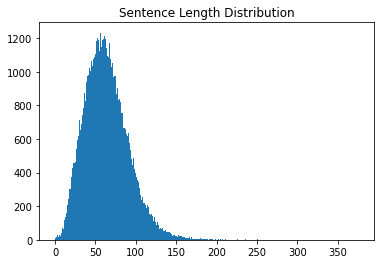

In [10]:
min_len = 999
max_len = 0
sum_len = 0

############# set을 이용해서 중복된 데이터들을 제거하는 부분
cleaned_corpus = list(set(raw))
print("Data size: ",len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 길이가 최소 10에서 최대 150 사이인 문장들만 이용

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


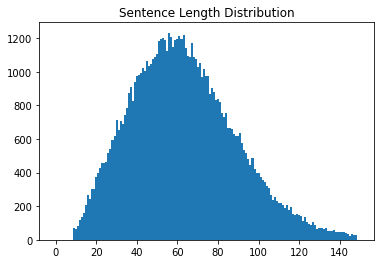

In [11]:
max_len = 150
min_len = 10

#min_len보다 길고 Max_len보다 짧은 문장들만 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s)>=min_len)]


#분포도를 다시 그리기
sentence_length = np.zeros((max_len),dtype=int)
print(sentence_length)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] +=1
    
plt.bar(range(max_len),sentence_length,width=1.0)
plt.title("Sentence Length Distribution")
plt.show()
    

# 2-3. 공백 기반 토큰화

In [24]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [25]:
split_corpus = []
for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [26]:
split_tensor,split_tokenizer = tokenize(split_corpus)
print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [31]:
for idx,word in enumerate(split_tokenizer.word_index):
    print("idx : ",word)
    if idx > 10 : break
        
#공백 기준으로 토큰을 만들게 되면
#밝히다, 밝다와 같은 단어들을 모두 다른 토큰으로 인식해서
#불필요하게 단어사전이 커지게 되고 이는 연산량 증가로 이어지게 된다. 

idx :  이
idx :  밝혔다.
idx :  있다.
idx :  말했다.
idx :  수
idx :  있는
idx :  그는
idx :  대한
idx :  위해
idx :  전했다.
idx :  지난
idx :  이번


# 2-4 형태소 기반 토큰화

In [38]:
from konlpy.tag import Mecab

def mecab_split(corpus):  # corpus: Tokenized Sentence's List
    mecab = Mecab()
    return mecab.morphs(corpus)

mecab_corpus = []
for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [39]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))


MeCab Vocab Size: 52279


### tensor를 다시 decoding 하기

In [51]:
decoded_text = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(decoded_text[0])

또한 30 위 밖 으로 떨어졌 던 제리 켈리 와 아론 오베르 서 는 손목 부상 으로 10 위 권 안 으로 들어오 게 된다 해도 경기 에 참가 하 지 못하 게 됐 다 .


In [57]:
sentence = ""
for i in mecab_tensor[100]:
    if i==0: continue
    sentence += mecab_tokenizer.index_word[i] + " "
print(sentence)

또한 30 위 밖 으로 떨어졌 던 제리 켈리 와 아론 오베르 서 는 손목 부상 으로 10 위 권 안 으로 들어오 게 된다 해도 경기 에 참가 하 지 못하 게 됐 다 . 
